# Project 2: 
# H1B and STEM Occupation Analysis

By [Celeste Li](https://www.linkedin.com/in/celeste-li-4053b3267/)

This report presents a detailed analysis of H1B visa data and STEM occupation information from my perspective as an international graduate student majoring in STEM. The goal is to identify key patterns and derive insights from the integration of these datasets. The analysis focuses on aligning SOC (Standard Occupational Classification) codes, cleaning the data, merging datasets, and using visualizations to uncover valuable insights.

**Datasets**
1. **H1B Visa Data**: Contains details about job positions, worksite locations, prevailing wages, and SOC codes for H1B visa applications.
2. **STEM Occupation Data**: Lists occupations classified as STEM-related, along with their SOC codes and types.


### Step 1: Data Loading

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load datasets
stem_occupation = pd.read_csv("All_STEM_Occupation.csv")
h1b_data = pd.read_csv("H1B.csv")

### Step 2: Data Cleaning
The SOC codes in the H1B data were reformatted to align with the STEM occupation data format. This ensured compatibility for merging. Besides, missing values in critical columns, such as soc_code and prevailing_wage, were removed to maintain data integrity.

In [6]:
# Fix the SOC code format in H1B data to match STEM occupation format
def format_soc_code(soc_code):
    if len(soc_code.split(".")) == 1:  # If no decimals, append ".00"
        return soc_code + ".00"
    return soc_code

h1b_data["soc_code"] = h1b_data["soc_code"].astype(str).apply(format_soc_code)

In [7]:
# Data Cleaning: Remove rows with missing values in critical columns
h1b_data_cleaned = h1b_data.dropna(subset=["soc_code", "prevailing_wage"])

### Step 3: Data Integration
The two datasets were merged on SOC codes to enable joint analysis of H1B visa data and STEM occupation types.

In [8]:
# Merge datasets on SOC Code
merged_data = pd.merge(
    h1b_data_cleaned,
    stem_occupation,
    left_on="soc_code",
    right_on="Code",
    how="inner"
)

### Step 4: Visual Analysis
Multiple visualizations were created to explore trends in wages, job titles, and the distribution of occupations across states.

**1.Top States by Average Prevailing Wage**

From the graph, Nevada emerges as the state with the highest average prevailing wage, nearly reaching 250,000 dollars, followed by Arizona with an average wage slightly exceeding 200,000 dollars. West Virginia, Colorado, and Washington fall within the 150,000-200,000 dollars range. The higher prevailing wages in these states could reflect the presence of specialized industries or occupations that command premium salaries, potentially making them attractive locations for high-wage job seekers. However, these states may also present challenges such as limited job diversity or reduced H1B sponsorship availability compared to traditional hubs like California or New York.

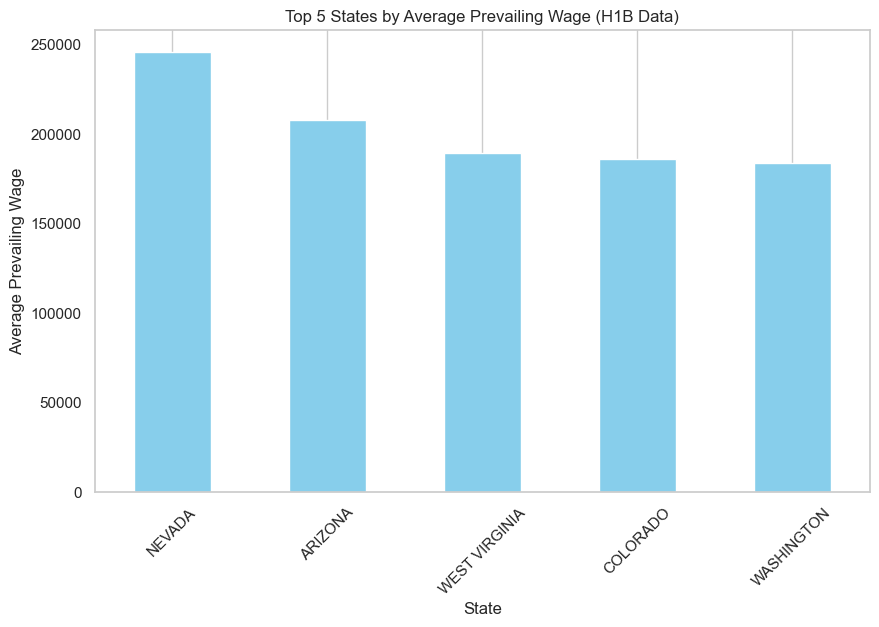

In [32]:
# Visualization 1: H1B Data - Top 5 prevailing_wage and worksite_state_full
top5_states = h1b_data_cleaned.groupby("worksite_state_full")["prevailing_wage"].mean().nlargest(5)
plt.figure(figsize=(10, 6))
top5_states.plot(kind="bar", color="skyblue")
plt.title("Top 5 States by Average Prevailing Wage (H1B Data)")
plt.xlabel("State")
plt.ylabel("Average Prevailing Wage")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.show()

**2. Top Job Titles by Average Prevailing Wage**

The top-ranking job titles reveal a clear trend toward leadership, niche expertise, and healthcare roles. Chief Financial Officer (CFO) and Huntsworth Health Global lead with the highest prevailing wages, followed by roles like Physical Therapist, Senior Flow Assurance Engineer, Senior R&D EMI/SI Engineer, and a regional managerial role focused on the Georgian, Caucasus, and Eastern Europe regions. These positions highlight the value of specialized skills, technical expertise, and leadership capabilities in driving wage premiums.

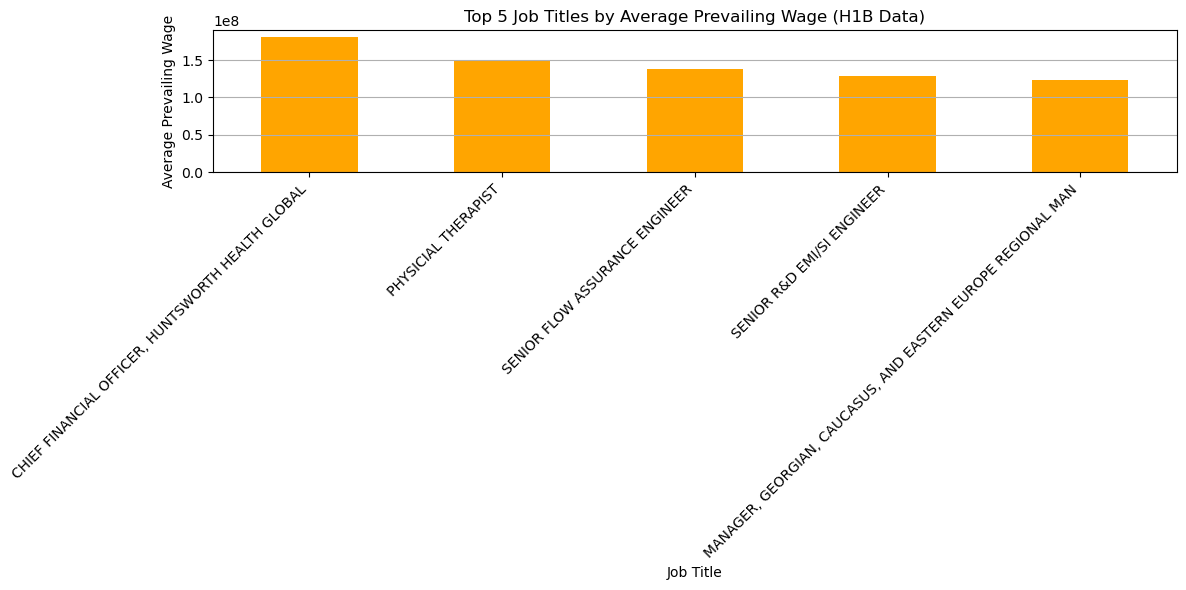

In [17]:
# Visualization 2: H1B Data - Top 5 prevailing_wage and soc_name
top5_jobs = h1b_data_cleaned.groupby("job_title")["prevailing_wage"].mean().nlargest(5)
plt.figure(figsize=(12, 6))
top5_jobs.plot(kind="bar", color="orange")
plt.title("Top 5 Job Titles by Average Prevailing Wage (H1B Data)")
plt.xlabel("Job Title")
plt.ylabel("Average Prevailing Wage")
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.grid(axis="y")
plt.tight_layout()
plt.show()

**3. STEM Occupation Trends – Job Counts and Average Wage**

The most prevalent STEM occupations by count are "Research, Development, Design, and Practitioners," followed by "Technologists and Technicians," "Postsecondary Teaching," "Managerial," and "Sales" roles. This distribution underscores the importance of innovation-driven roles and technical positions within the STEM sector.

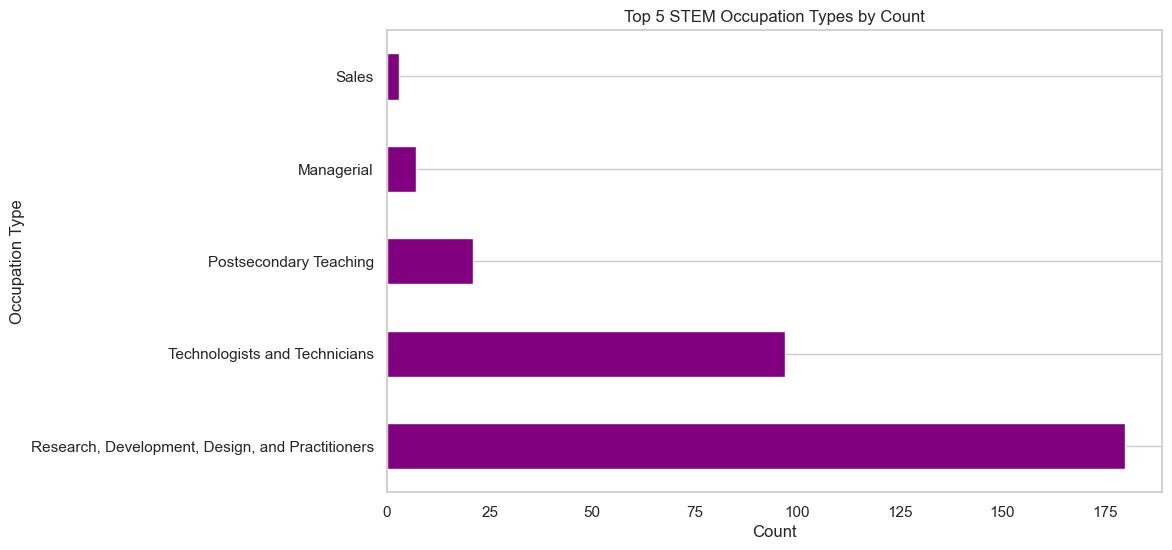

In [30]:
# Visualization 3: STEM Occupation Data - Top 5 Count of Jobs by Occupation Types (stacked bar)
occupation_type_counts = stem_occupation["Occupation Types"].value_counts().nlargest(5)
plt.figure(figsize=(10, 6))
occupation_type_counts.plot(kind="barh", color="purple")
plt.title("Top 5 STEM Occupation Types by Count")
plt.xlabel("Count")
plt.ylabel("Occupation Type")
plt.grid(axis="x")
plt.show()

**4. Top 5 Average Wage by Occupation Type**

Interestingly, the highest wages are not associated with the most common occupation types. Managerial roles top the list with an average wage of 261,158 dollars, followed by Sales at 164,915 dollars. "Postsecondary Teaching" and "Research, Development, Design, and Practitioners" are mid-tier in wages, while "Technologists and Technicians" have the lowest average wage among the top five categories at 122,907 dollars. This disparity reveals a key challenge for STEM professionals, particularly for international students relying on H1B sponsorships, where roles with lower sponsorship availability often align with higher wages, creating a stark dilemma for career planning.

C:\Users\Administrator\AppData\Local\Temp\ipykernel_138760\3350916208.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


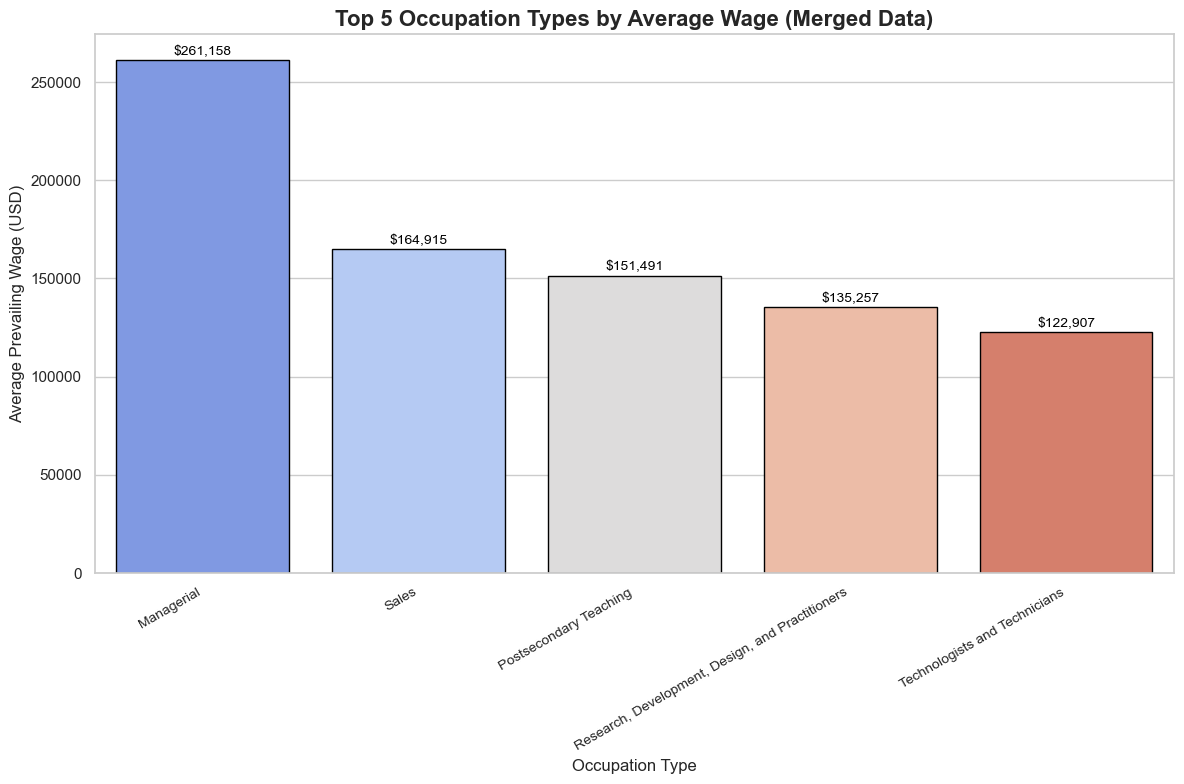

In [31]:
# Visualization 4: Merged Data - Top 5 Average Wage by Occupation Type
top8_avg_wage = (
    merged_data.groupby("Occupation Types")["prevailing_wage"]
    .mean()
    .nlargest(5)
    .sort_values(ascending=False)
)

# Set plot size and style
plt.figure(figsize=(12, 8))
sns.set_theme(style="whitegrid")

# Create the bar plot with enhanced design
sns.barplot(
    x=top8_avg_wage.index,
    y=top8_avg_wage.values,
    palette="coolwarm",
    edgecolor="black",
)

# Add titles and labels
plt.title("Top 5 Occupation Types by Average Wage (Merged Data)", fontsize=16, weight="bold")
plt.xlabel("Occupation Type", fontsize=12)
plt.ylabel("Average Prevailing Wage (USD)", fontsize=12)

# Improve x-axis readability
plt.xticks(rotation=30, ha="right", fontsize=10)

# Display value annotations on bars
for index, value in enumerate(top8_avg_wage.values):
    plt.text(
        index, value + 1000, f"${int(value):,}", 
        ha="center", va="bottom", fontsize=10, color="black"
    )

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


**5. Geographic Distribution of Occupation Types**

California leads in H1B sponsorships, followed by Texas, New Jersey, New York, Illinois, Pennsylvania, Georgia, and Massachusetts. Within these states, "Research, Development, Design, and Practitioners" consistently account for the largest fraction of job types, especially pronounced in California. This trend likely reflects the influence of the West Coast's robust tech and innovation ecosystems. The dominance of such roles across states highlights the growing importance of research and development in shaping the U.S. job market for H1B applicants.

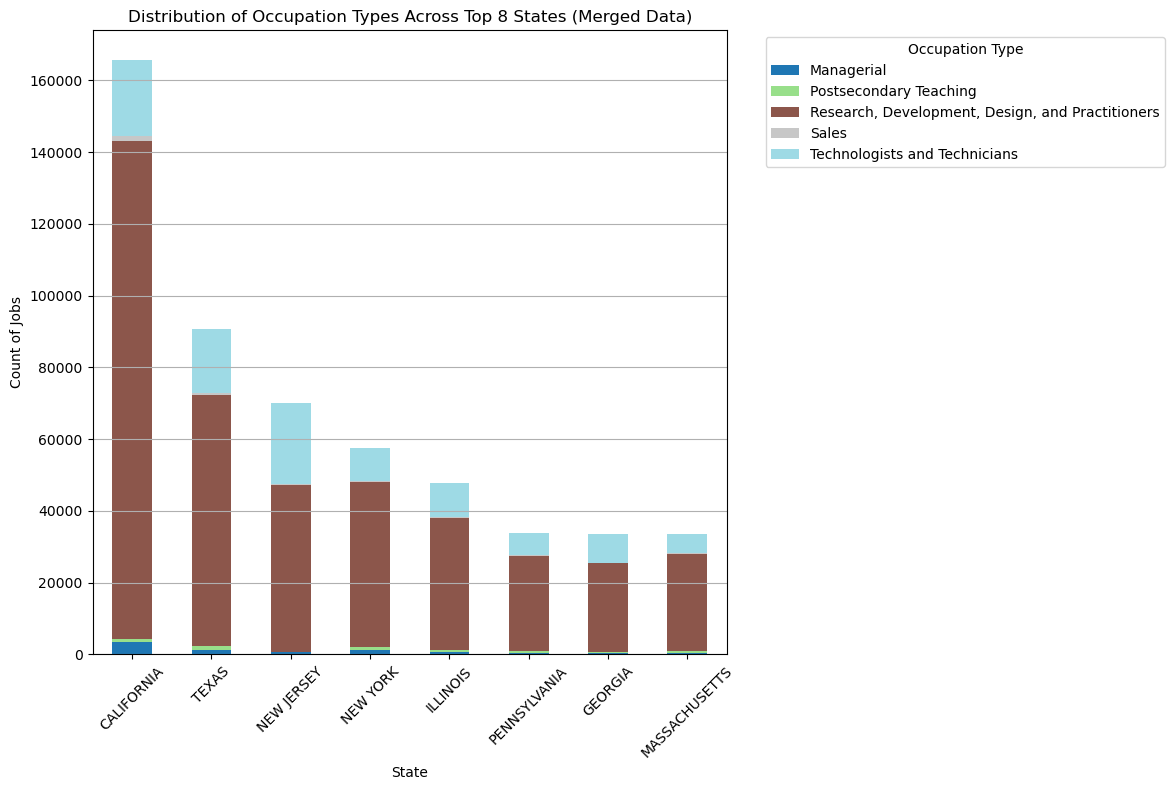

In [23]:
# Visualization 5: Merged Data - worksite_state_full and Occupation Types
# Group data by state and occupation type
state_type_counts = merged_data.groupby(["worksite_state_full", "Occupation Types"]).size().unstack(fill_value=0)

# Select top 8 states by total counts across all occupation types
top8_states = state_type_counts.sum(axis=1).nlargest(8).index
state_type_counts_top8 = state_type_counts.loc[top8_states]  # Filter only these top 8 states

# Plot stacked bar chart
state_type_counts_top8.plot(kind="bar", stacked=True, figsize=(12, 8), cmap="tab20")
plt.title("Distribution of Occupation Types Across Top 8 States (Merged Data)")
plt.xlabel("State")
plt.ylabel("Count of Jobs")
plt.xticks(rotation=45)
plt.legend(title="Occupation Type", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.grid(axis="y")
plt.show()